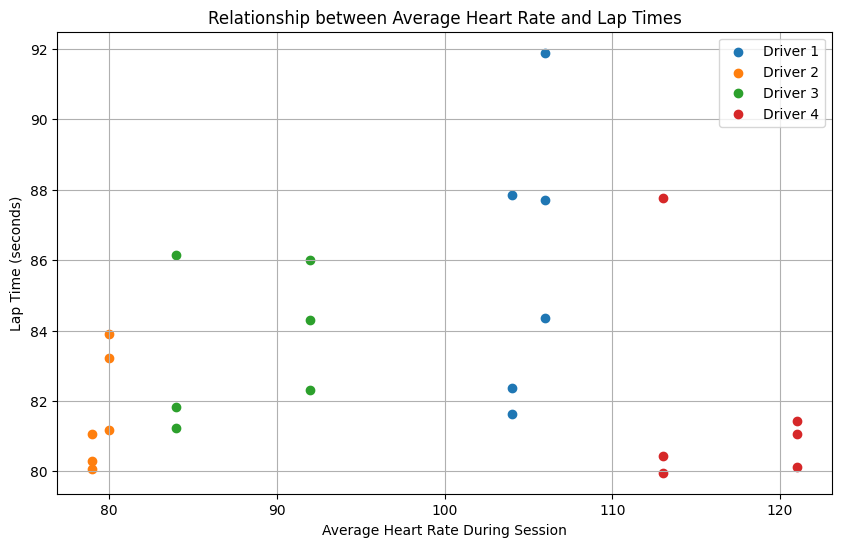

In [5]:
plt.figure(figsize=(10, 6))
for driver_id in merged_df['ID'].unique():
    driver_data = merged_df[merged_df['ID'] == driver_id]
    plt.scatter(driver_data['HR avg session'], driver_data['Time_seconds'], label=f'Driver {driver_id}')

plt.title('Relationship between Average Heart Rate and Lap Times')
plt.xlabel('Average Heart Rate During Session')
plt.ylabel('Lap Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()



Merged DataFrame Columns:
Index(['ID', 'Session', 'Track', 'Intervention', 'Lap', 'Sector 1', 'Sector 2',
       'Sector 3', 'Sector 4', 'Time', 'Time_seconds', 'HR rest', 'HR max',
       'RR rest', 'HR avg session', 'HR max session', 'RR avg session',
       'RR max session', 'Session potential', 'Session confidence ',
       'Session stress ', 'Extraversion', 'Risk tolerance',
       'Stress resilience', 'Open-mindedness', 'Conscientiousness',
       'Agreeableness', 'Emotional stability', 'Self-efficacy'],
      dtype='object')


/var/folders/nd/mxm61zld2bj2bp00mgb3w7yw0000gp/T/ipykernel_93101/1759535915.py:39: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

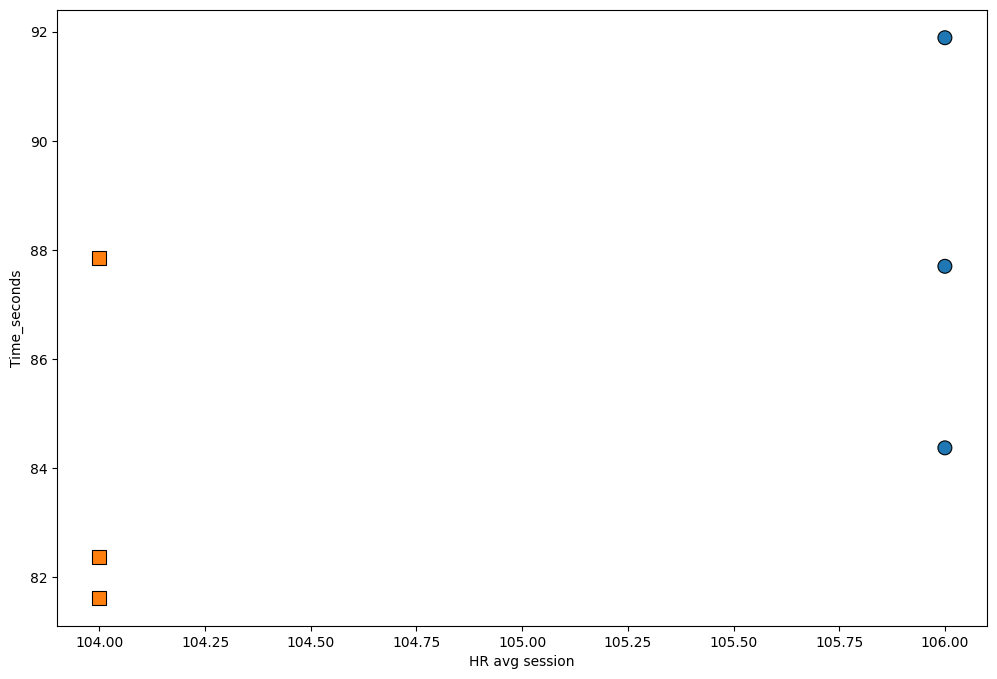

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the lap time data
lap_times_file_path = '/Users/home/desktop/CCIR-laptimes.csv'
lap_times_df = pd.read_csv(lap_times_file_path)

# Convert the 'Time' column to seconds
def time_to_seconds(time_str):
    min_sec = time_str.split(':')
    return int(min_sec[0]) * 60 + float(min_sec[1])

lap_times_df['Time_seconds'] = lap_times_df['Time'].apply(time_to_seconds)

# Load the biometric and self-report data
biometric_self_report_file_path = '/Users/home/desktop/CCIR-biometrics.csv'
biometric_self_report_df = pd.read_csv(biometric_self_report_file_path)

# Merge the dataframes
merged_df = pd.merge(lap_times_df, biometric_self_report_df, on=['ID', 'Session', 'Track', 'Intervention'])

# Print the merged dataframe columns to confirm
print("\nMerged DataFrame Columns:")
print(merged_df.columns)

# Define color palette
palette = sns.color_palette("tab10", n_colors=merged_df['ID'].nunique())

# Define markers for tracks
markers = {'A': 'o', 'B': 's'}

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot data
for i, driver_id in enumerate(merged_df['ID'].unique()):
    driver_data = merged_df[merged_df['ID'] == driver_id]
    sns.scatterplot(
        data=driver_data, 
        x='HR avg session', 
        y='Time_seconds', 
        hue='Intervention', 
        style='Track', 
        palette=palette, 
        markers=markers, 
        s=100,
        edgecolor='black',
        label=f'Driver {driver_id}'
    )

# Customize plot
plt.title('Relationship between Average Heart Rate and Lap Times')
plt.xlabel('Average Heart Rate During Session')
plt.ylabel('Lap Time (seconds)')
plt.legend(title='Driver ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


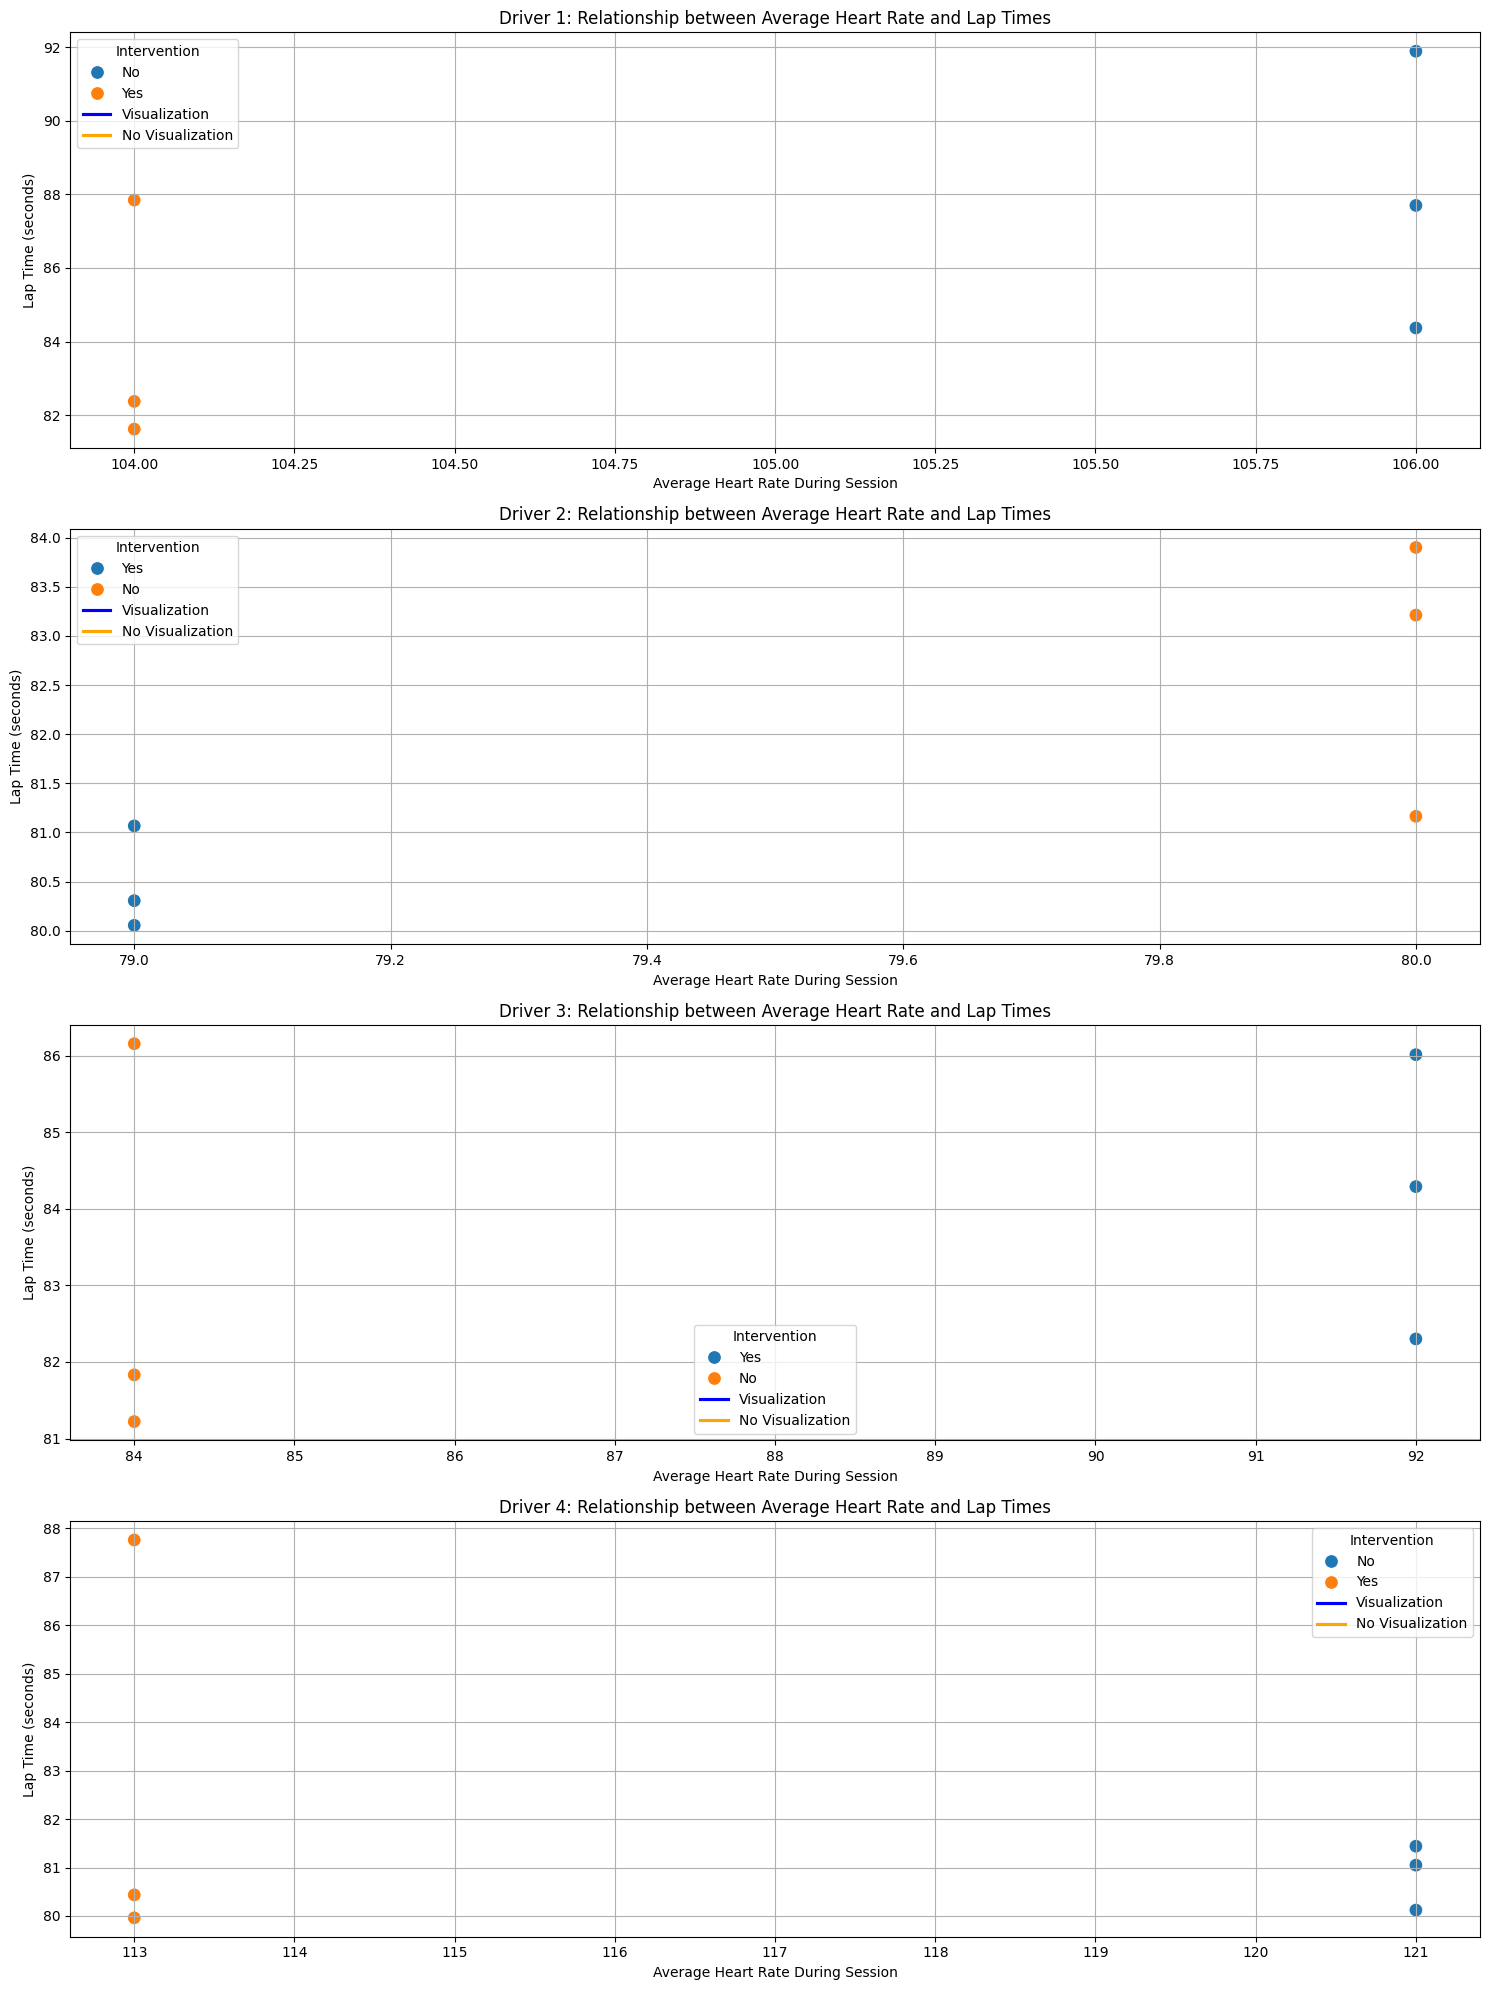

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique driver IDs
drivers = merged_df['ID'].unique()

# Create subplots for each driver
plt.figure(figsize=(15, len(drivers) * 5))

for i, driver_id in enumerate(drivers):
    driver_data = merged_df[merged_df['ID'] == driver_id]
    
    plt.subplot(len(drivers), 1, i + 1)
    
    # Plot scatter plot with different colors for intervention
    sns.scatterplot(data=driver_data, x='HR avg session', y='Time_seconds', hue='Intervention', palette='tab10', s=100)
    
    # Add regression lines for each intervention
    sns.regplot(data=driver_data[driver_data['Intervention'] == 'Yes'], x='HR avg session', y='Time_seconds', scatter=False, color='blue', label='Visualization')
    sns.regplot(data=driver_data[driver_data['Intervention'] == 'No'], x='HR avg session', y='Time_seconds', scatter=False, color='orange', label='No Visualization')
    
    # Add title and labels
    plt.title(f'Driver {driver_id}: Relationship between Average Heart Rate and Lap Times')
    plt.xlabel('Average Heart Rate During Session')
    plt.ylabel('Lap Time (seconds)')
    plt.legend(title='Intervention')
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
